# Users, Customers and Everything In Between
### Yandex.Afisha Q2 2018 - User Metrics

**Description:**<br>
We will be taking a look at our user activity in the last 12 months, and based on our analysis and conclusions make recommendations on steps to take in order to improve our product and future business models.


### Table of Contents

- [import libraries](#import_libraries)     
- [Loading the data](#Loading_the_data)
- [Data exploration](#Data_exploration)
- [Data adjustment](#Data_adjustment)
- [Metrics report](#Metrics_report)
- [product](#product)
    - [How many people use our product every day, week, and month](#How_many_people_use_our_product_every_day,_week,_and_month)
    - [How many sessions we have per day](#How_many_sessions_we_have_per_day)
    - [What is the length of each session?](#What_is_the_length_of_each_session?)
    - [How often do users come back?](#How_often_do_users_come_back?)
    - [Product analysis conclusions](#Product_analysis_conclusions)

- [sales](#sales)
    - [When do people start buying?](#When_do_people_start_buying?)
    - [How many orders our customers made over the months](#How_many_orders_our_customers_made_over_the_months)
    - [Our customers average purchase size](#Our_customers_average_purchase_size)
    - [How much money our customers bring, LTV (Life Time Value) of a customer](#How_much_money_our_customers_bring,_LTV_(Life_Time_Value)_of_a_customer)
    - [Sales analysis conclusions](#Sales_analysis_conclusions)

- [marketing](#marketing)
    - [How much money we spent, overall, per source, over the months](#How_much_money_we_spent,_overall,_per_source,_over_the_months)
    - [How much did customer acquisition cost from each of the sources](#hhh)
    - [How worthwhile were our investments, ROI (Return On Investment)](#How_worthwhile_were_our_investments,_ROI_(Return_On_Investment))
    - [Marketing analysis conclusions](#Marketing_analysis_conclusions)

- [General conclusion & suggestions](#General_conclusion_&_suggestions)

<a id='import_libraries'></a>

### Importing libraries

In [1]:
# Importing pandas and useful tools
import pandas as pd
import numpy as np 
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import datetime as dt

from scipy import stats as st
from pandas.api.types import is_numeric_dtype
from pandas.api.types import is_object_dtype

from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = 'all'

In [2]:
!pip install matplotlib -q
!pip install plotly_express -q
!pip install plotly -q
!pip install seaborn -q

<a id='Loading_the_data'></a>

### Loading the data

In [3]:
# loading the data using the try except command because of local jupyter use

try:
    visits = pd.read_csv(
        '/datasets/visits_log_us.csv', 
        dtype={'Device': 'category'}, 
        parse_dates=['Start Ts', 'End Ts']
        ) 
    orders = pd.read_csv(
        '/datasets/orders_log_us.csv', 
        parse_dates=['Buy Ts']
        ) 
    costs = pd.read_csv(
        '/datasets/costs_us.csv', 
        parse_dates=['dt']
        ) 

except:
    visits = pd.read_csv(
        'C:\\Users\\User\\Desktop\\Py\\csv\\visits_log_us.csv', 
        dtype={'Device': 'category'}, 
        parse_dates=['Start Ts', 'End Ts']
        ) 
    orders = pd.read_csv(
        'C:\\Users\\User\\Desktop\\Py\\csv\\orders_log_us.csv', 
        parse_dates=['Buy Ts']
        ) 
    costs = pd.read_csv(
        'C:\\Users\\User\\Desktop\\Py\\csv\\costs_us.csv', 
        parse_dates=['dt']
        ) 

In [4]:
# Naming datasets for ease of use
visits.name = 'visits'
orders.name = 'orders'
costs.name = 'costs'

***
<a id='Data_exploration'></a>

# Data exploration
**Description of the data**

### `The visits table`
**server logs with data on website visits, All dates in this table are in YYYY-MM-DD format**

- `Uid` — user's unique identifier
- `Device` — user's device
- `Start Ts` — session start date and time
- `End Ts` — session end date and time
- `Source Id` — identifier of the ad source the user came from

### `The orders table`
**data on orders**
- `Uid` — unique identifier of the user making an order
- `Buy Ts` — order date and time
- `Revenue` — Yandex.Afisha's revenue from the order

### `The costs table`
**data on marketing expenses**
- `source_id` — ad source identifier
- `dt` — date
- `costs` — expenses on this ad source on this day

In [5]:
# Data frames dimensions
visits.shape
orders.shape
costs.shape

(359400, 5)

(50415, 3)

(2542, 3)

In [6]:
# Viewing initial info on the datasets
print('Datasets info:')
print("---------------------------------------------------")
print('{: <10} | {: <7} | {: <7} | {: <7} | {: <}'.format("Frame name", "Rows", "Columns", "Duplicates", "nulls"))
print("---------------------------------------------------")
for df in (visits, orders, costs):
    print('{: <10} | {: <7} | {: <7} | {: <10} | {: <}'.format(df.name, df.shape[0], df.shape[1], df.duplicated().sum(),df.isnull().sum().sum()))
    

Datasets info:
---------------------------------------------------
Frame name | Rows    | Columns | Duplicates | nulls
---------------------------------------------------
visits     | 359400  | 5       | 0          | 0
orders     | 50415   | 3       | 0          | 0
costs      | 2542    | 3       | 0          | 0


In [7]:
# Checking to see if we have any values equal to 0
for df in (visits, orders, costs):
    for column_name in df.columns:
        if is_numeric_dtype(df[column_name]) == True:
            column = df[column_name]
            count = (column == 0).sum()
            print('{: <22} | {: <}'.format(column_name, count))

Source Id              | 0
Uid                    | 0
Revenue                | 51
Uid                    | 0
source_id              | 0
costs                  | 0


In [8]:
zero_per_orders = (len(orders.loc[orders['Revenue'] == 0]) / len(orders.index))
print('The percentage of values equal to 0 in the orders data frame: {:.2%}'.format(zero_per_orders))

The percentage of values equal to 0 in the orders data frame: 0.10%


In [9]:
# Viewing initial info on the datasets
for df in (visits, orders, costs):
    print(df.name)
    df.info()
    print('~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~')

visits
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 359400 entries, 0 to 359399
Data columns (total 5 columns):
 #   Column     Non-Null Count   Dtype         
---  ------     --------------   -----         
 0   Device     359400 non-null  category      
 1   End Ts     359400 non-null  datetime64[ns]
 2   Source Id  359400 non-null  int64         
 3   Start Ts   359400 non-null  datetime64[ns]
 4   Uid        359400 non-null  uint64        
dtypes: category(1), datetime64[ns](2), int64(1), uint64(1)
memory usage: 11.3 MB
~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~
orders
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50415 entries, 0 to 50414
Data columns (total 3 columns):
 #   Column   Non-Null Count  Dtype         
---  ------   --------------  -----         
 0   Buy Ts   50415 non-null  datetime64[ns]
 1   Revenue  50415 non-null  float64       
 2   Uid      50415 non-null  uint64        
dtypes: datetime64[ns](1), float64(1), uint64(1)
memory usage: 1.2 MB
~~~~~~~~~~~~~~~

In [10]:
# Viewing initial info on the data
for df in (visits, orders, costs):
    print('{} table:'.format(df.name))
    df.describe().style.background_gradient(cmap = 'PuBu')

visits table:


orders table:


costs table:


### First conclusions 

- We have no duplicates.

- There are no abnormally high or low values.

- There are some values equal to 0 in the Revenue column of the order table.

- Need to change names to lower case and also swap spaces with underscores for the columns of the visits and orders tables.

***
<a id='Data_adjustment'></a>

# Data adjustment

### Steps to take
- Adjust the column names, so that they will be in lower case, and have underscores insted of spaces.
- We will add a year, month, week and day columns to our visits and orders tables.

In [11]:
# Changing the names of our columns, so that they will all be lowercase, and have no spaces
for df in (visits, orders):
    df.rename(columns=str.lower, inplace=True)
    df.columns = df.columns.str.replace(' ','_')
    print('{} table: '.format(df.name))
    df.columns

visits table: 


Index(['device', 'end_ts', 'source_id', 'start_ts', 'uid'], dtype='object')

orders table: 


Index(['buy_ts', 'revenue', 'uid'], dtype='object')

In [12]:
# Adding year, month, week and day columns to our visits table
visits['s_year']  = visits['start_ts'].dt.year
visits['s_month'] = visits['start_ts'].dt.month
visits['s_week']  = visits['start_ts'].dt.isocalendar().week
visits['s_date'] = visits['start_ts'].dt.date

In [13]:
# Adding year, month, week and day columns to our orders table
orders['o_year']  = orders['buy_ts'].dt.year
orders['o_month'] = orders['buy_ts'].dt.month
orders['o_week']  = orders['buy_ts'].dt.isocalendar().week
orders['o_date'] = orders['buy_ts'].dt.date

In [14]:
# Reducing memory usage
visits['source_id'] = visits['source_id'].apply(pd.to_numeric, downcast='integer')
orders['revenue'] = orders['revenue'].apply(pd.to_numeric, downcast='float')
costs['source_id'] = costs['source_id'].apply(pd.to_numeric, downcast='integer')
costs['costs'] = costs['costs'].apply(pd.to_numeric, downcast='float')

***
<a id='Metrics_report'></a>

# Metrics report

### `Product`
**We will take a look at**
- How many people use our product every day, week, and month.
- How many sessions are there per day.
- What is the length of each session.
- How often do users come back to use our product.

### `Sales`
**We will take a look at**
- How long does it take to convert a user into a customer, the time between registration and purchase.
- How many orders our customers make during a given period time.
- What is our customers average purchase size.
- How much money our customers bring, LTV (Life Time Value) of a customer.

### `Marketing`
**We will take a look at**
- How much money we spent, overall, per source, and over the months.
- How much did customer acquisition cost from each of the sources.
- How worthwhile were our investments, ROI (Return On Investment).

<a id='product'></a>

## Product

<a id='How_many_people_use_our_product_every_day,_week,_and_month'></a>

### `How many people use our product every day, week, and month`

In [15]:
# Taking a look at average user usage per time period
dau_total = visits.groupby('s_date').agg({'uid': 'nunique'}).mean()
wau_total = visits.groupby(['s_year', 's_week']).agg({'uid': 'nunique'}).mean()
mau_total = visits.groupby(['s_year', 's_month']).agg({'uid': 'nunique'}).mean()
print('Average product usage:')
print('{} people use our product on a daily basis'.format(int(dau_total)))
print('{} people use our product on a weekly basis'.format(int(wau_total)))
print('{} people use our product on a monthly basis'.format(int(mau_total)))

Average product usage:
907 people use our product on a daily basis
5716 people use our product on a weekly basis
23228 people use our product on a monthly basis


In [16]:
# Creating bar plots to showcase user traffic per week and per month
w_usage = visits.groupby(['s_year', 's_week']).agg({'uid': 'nunique'}).reset_index()
m_usage = visits.groupby(['s_year', 's_month']).agg({'uid': 'nunique'}).reset_index()

fig = px.bar(w_usage ,x=w_usage.index, y='uid',
             color='uid',
             color_continuous_scale='Teal',
             title='User traffic per week')
fig.update_layout(plot_bgcolor='AliceBlue',
                  xaxis_title='June 2017 - May 2018')

fig = px.bar(m_usage ,x=m_usage.index, y='uid',
             color='uid',
             color_continuous_scale='Teal',
             title='User traffic per month')
fig.update_layout(plot_bgcolor='AliceBlue',
                  xaxis_title='June 2017 - May 2018')

#### Intermediate conclusion
- We can see a big peak in the middle, which is 01/01/2018, at the start of the year we have higher traffic, lots of people want tickets.
- In the middle of the year we have lower traffic.

<a id='How_many_sessions_we_have_per_day'></a>

### `How many sessions we have per day`

In [17]:
# Creating a table that will show the amount of sessions, unique users, and sessions per user
s_per_user = visits.groupby('s_date').agg({'uid': ['count', 'nunique']})
s_per_user.columns = ['n_sessions', 'n_users']
s_per_user['sessions_per_user'] = (s_per_user['n_sessions'] / s_per_user['n_users'])
s_per_user.head(10)

n_sessions  n_users  sessions_per_user
s_date                                            
2017-06-01         664      605           1.097521
2017-06-02         658      608           1.082237
2017-06-03         477      445           1.071910
2017-06-04         510      476           1.071429
2017-06-05         893      820           1.089024
2017-06-06         875      797           1.097867
2017-06-07         788      699           1.127325
2017-06-08         939      868           1.081797
2017-06-09         755      695           1.086331
2017-06-10         375      350           1.071429

In [18]:
# Taking a look at the average amount of sessions per user
round((s_per_user['sessions_per_user'].mean()), 3)

1.082

In [19]:
# using a bar plot to visualize the amount of sessions we had each day, across our time frame
fig = px.bar(
        s_per_user ,x=s_per_user.index, y='n_sessions',
        color='n_sessions',
        color_continuous_scale='Teal',
        )
        
fig.update_layout(
        plot_bgcolor='AliceBlue',
        title='Number of Sessions per day',
        xaxis_title='June 2017 - May 2018',
        yaxis_title='Number of Sessions'
        )

**Lets take a look at our data when we devide it into our 2 device groups, desktop and touch**

In [20]:
# Creating a table that will contain the amount daily sessions for each of our device groups

# Desktop group
d_visits = visits.query('device == "desktop"')
d_s_per_user = d_visits.groupby('s_date').agg({'uid': ['count', 'nunique']})
d_s_per_user.columns = ['desktop_sessions', 'd_n_users']
d_s_per_user['d_sessions_per_user'] = (d_s_per_user['desktop_sessions'] / d_s_per_user['d_n_users'])

# Touch group
t_visits = visits.query('device == "touch"')
t_s_per_user = t_visits.groupby('s_date').agg({'uid': ['count', 'nunique']})
t_s_per_user.columns = ['touch_sessions', 't_n_users']
t_s_per_user['t_sessions_per_user'] = (t_s_per_user['touch_sessions'] / t_s_per_user['t_n_users'])

# Merge
d_s_per_user = d_s_per_user.merge(t_s_per_user, on='s_date')

In [21]:
# Taking a look at the average amount of sessions per user, per device group
print('Average amount of sessions per user, in the desktop group: {}'.format(
    round((d_s_per_user['d_sessions_per_user'].mean()), 3)))
print('Average amount of sessions per user, in the touch group: {}'.format(
    round((t_s_per_user['t_sessions_per_user'].mean()), 3)))

Average amount of sessions per user, in the desktop group: 1.089
Average amount of sessions per user, in the touch group: 1.051


In [22]:
avg_d = round((d_s_per_user['desktop_sessions'].mean()), 3)
avg_t = round((d_s_per_user['touch_sessions'].mean()), 3)
print('Average amount of daily sessions for desktop users: {}'.format(avg_d))
print('Average amount of daily sessions for touch users: {}'.format(avg_t))

Average amount of daily sessions for desktop users: 723.322
Average amount of daily sessions for touch users: 266.758


In [23]:
# using a line plot to visualize the amount of sessions we had each day, across our time frame, for each device group
fig = px.line(d_s_per_user[['desktop_sessions', 'touch_sessions']])
fig.update_layout(
    plot_bgcolor='AliceBlue',
    title='Number of Sessions per day, for each usage group',
    xaxis_title='June 2017 - May 2018',
    yaxis_title='Number of Sessions',
    legend_title="Usage group",
    )

#### Intermediate conclusion
- We can see a similar trend as we have seen in the user traffic graph, the number of sessions peaks around january, and then slowly declines in numbers.
- Average amount of sessions per user each day is 1.08, so we can assume most of our users only use the product once a day.
- In terms of difference between our device groups, we can see that average daily sessions per user is around the same, but the amount of daily sessions per day from the desktop group is almost 3 times higher than the touch device group.

<a id='What_is_the_length_of_each_session?'></a>

### `What is the length of each session?`

In [24]:
# Creating a session duration columns
visits['s_duration_sec'] = (visits['end_ts'] - visits['start_ts']).dt.seconds

In [25]:
# Taking a look at the average session duration using mode
print(visits['s_duration_sec'].mode())

0    60
dtype: int64


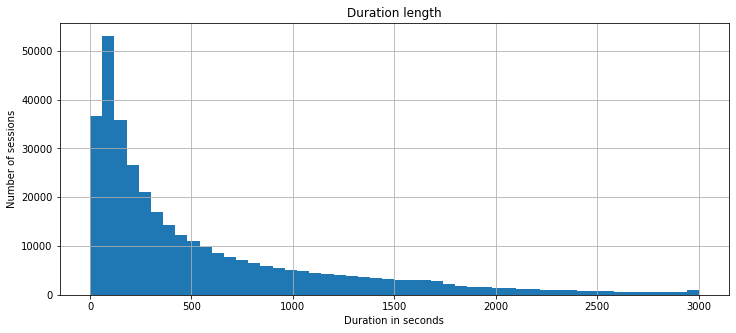

In [26]:
# taking a look at session lengths amount
visits['s_duration_sec'].hist(bins=50, range=(0, 3000), figsize=(12,5))
plt.title('Duration length')
plt.xlabel('Duration in seconds')
plt.ylabel('Number of sessions');

#### Intermediate conclusion
- The average duration per session is around 60 seconds.

<a id='How_often_do_users_come_back?'></a>

### `How often do users come back?`

In [27]:
# Adding a first activity date to the visits table
first_activity_date = visits.groupby(['uid'])['start_ts'].min()
first_activity_date.name = 'first_activity_date'
visits = visits.join(first_activity_date, on='uid')

In [28]:
# Adding activity month column
visits['activity_month'] = pd.to_datetime(
    visits['start_ts'], unit='d') - pd.to_timedelta(
        visits['start_ts'].dt.day, unit='d') + dt.timedelta(days=1)

In [29]:
# Adding first activity month column
visits['first_activity_month'] = pd.to_datetime(
    visits['first_activity_date'], unit='d') - pd.to_timedelta(
        visits['first_activity_date'].dt.day, unit='d') + dt.timedelta(days=1)

In [30]:
# Removing unnecessary hours minutes seconds values
visits['first_activity_date'] = visits['first_activity_date'].dt.date
visits['activity_month'] = visits['activity_month'].dt.date
visits['first_activity_month'] = visits['first_activity_month'].dt.date

In [31]:
# Creating a cohort lifetime column
visits['cohort_lifetime'] = ((
    pd.to_datetime(visits['activity_month']) - pd.to_datetime(visits['first_activity_month'])) / np.timedelta64(1,'M'))\
        .round().astype('int')

In [32]:
# Creating a monthly cohorts table
cohort_v = (
    visits.groupby(['first_activity_month', 'cohort_lifetime'])
    .agg({'uid': 'nunique'})
    .reset_index()
) 

In [33]:
# Creating a column of the initial size of the cohort
initial_users_count = cohort_v[cohort_v['cohort_lifetime'] == 0][['first_activity_month', 'uid']]
initial_users_count = initial_users_count.rename(
    columns={'uid': 'cohort_users'}
) 
cohort_v = cohort_v.merge(initial_users_count, on='first_activity_month')

In [34]:
# Creating a column that will showcase the retention rate
cohort_v['retention'] = cohort_v['uid'] / cohort_v['cohort_users'] 

In [35]:
# Creating a pivot table that will showcase the retention rate across our cohorts over time, periods of 1 month
retention_pivot = cohort_v.pivot_table(
    index='first_activity_month',
    columns='cohort_lifetime',
    values='retention',
    aggfunc='sum'
)

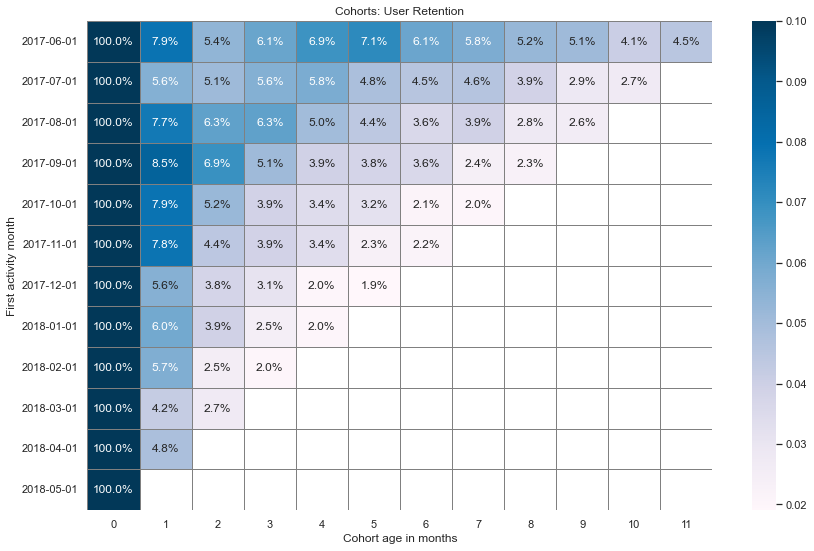

In [36]:
# Using a heat map to visualize our retention rate
sns.set(style='white')
plt.figure(figsize=(14, 9))
fig = sns.heatmap(
    retention_pivot,
    annot=True,
    fmt='.1%',
    linewidths=1,
    linecolor='gray',
    cmap = 'PuBu',
    vmax=0.1)
plt.title('Cohorts: User Retention')
plt.xlabel('Cohort age in months')
plt.ylabel('First activity month')
plt.show();

#### Intermediate conclusion
- Our retention rate is very low, only around 5 to 7 % of our customers come back to use our product.

<a id='Product_analysis_conclusions'></a>

### `Product analysis conclusions`
- There is a surge in usage of our product around the start of the new year.
- Most of our users are using the product from a desktop.
- Our users use the product for around 60 seconds each time, and mostly use it once a day.
- Not many people come back to use our product after their first use, only around 5 to 7 % of them come back.

***
<a id='sales'></a>

## Sales

<a id='When_do_people_start_buying?'></a>

### `When do people start buying? `

In [37]:
# Creating a first purchase date column
first_purchase_date = orders.groupby(['uid'])['buy_ts'].min()
first_purchase_date.name = 'first_purchase_date'

visits = visits.join(first_purchase_date, how='outer', on='uid')
visits['first_purchase_date'] = visits['first_purchase_date'].dt.date

In [38]:
# Creating a copy data frame that will only include users who are customers, i.e made a purchase
customers = visits.copy()
customers = customers.loc[customers['first_purchase_date'].notna()]
c_total = customers['uid'].nunique()
p_total = customers.shape[0]

In [39]:
# Creating a column that will showcase how long it took for a user to become a customer
customers.drop_duplicates('uid', inplace = True)
customers['time_to_conversion'] = ((
    pd.to_datetime(customers['first_purchase_date']) - \
    pd.to_datetime(customers['first_activity_date'])) / \
    np.timedelta64(1,'D')).astype('int')

In [40]:
# Calculating the average time it took for a user to become a customer
avg_c_t = round((customers['time_to_conversion'].mean()), 3)

228169 total users.
36523 users have made a purchase.
The conversion rate is 16.01%
25039 users made a purchase on their first day.
97394 total purchases were made.
On average customers made their first puchase after 16.896 days.


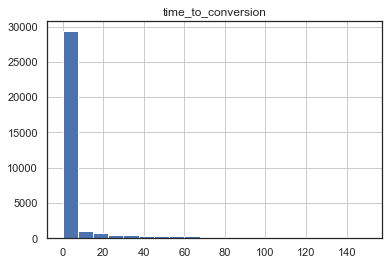

In [41]:
# Showcasing the stats
print('{} total users.'.format(visits['uid'].nunique()))
print('{} users have made a purchase.'.format(c_total))
print('The conversion rate is {:.2%}'.format(customers['uid'].nunique() / visits['uid'].nunique()))
print('{} users made a purchase on their first day.'.format(customers.query('time_to_conversion == 0').shape[0]))
print('{} total purchases were made.'.format(p_total))
print('On average customers made their first puchase after {} days.'.format(avg_c_t))
customers.hist('time_to_conversion', bins=20, range=(0,150));

#### Intermediate conclusion
- It looks like either users became paying users really quickly or just didnt buy anything at all.
- Seems like most users are using our product for a one time use.

<a id='How_many_orders_our_customers_made_over_the_months'></a>

### `How many orders our customers made over the months`

In [42]:
# Creating a first order date column
first_order_date = orders.groupby(['uid'])['buy_ts'].min()
first_order_date.name = 'first_order_date'
orders = orders.join(first_order_date, on='uid')

In [43]:
# Adding a month of order column
orders['order_month'] = pd.to_datetime(
    orders['buy_ts'], unit='d') - pd.to_timedelta(
        orders['buy_ts'].dt.day, unit='d') + dt.timedelta(days=1)

In [44]:
# Adding a first order month column
orders['first_order_month'] = pd.to_datetime(
    orders['first_order_date'], unit='d') - pd.to_timedelta(
        orders['first_order_date'].dt.day, unit='d') + dt.timedelta(days=1)

In [45]:
# Removing unnecessary hours minutes seconds values
orders['first_order_date'] = orders['first_order_date'].dt.date
orders['order_month'] = orders['order_month'].dt.date
orders['first_order_month'] = orders['first_order_month'].dt.date

In [46]:
# Adding cohort age column
orders['cohort_age'] = ((
    pd.to_datetime(orders['order_month']) - pd.to_datetime(orders['first_order_month'])) / np.timedelta64(1,'M'))\
        .round().astype('int')

In [47]:
# Taking a look at total amount of orders, cohort size, and order per customers for each of the cohorts
cohort_sizes = orders.groupby('first_order_month').agg({'uid': ['count', 'nunique']}).reset_index()
cohort_sizes.columns=['first_order_month','orders_sum','cohort_size']
cohort_sizes['ord_per_customer'] = (cohort_sizes['orders_sum'] / cohort_sizes['cohort_size'])
cohort_sizes.style.background_gradient(cmap = 'PuBu')

In [48]:
# Creating a table that will showcase amount of orders over time for each cohort
cohort_o = orders.groupby(['first_order_month','order_month'])['revenue'].count().reset_index()
cohort_o.columns=['first_order_month','month','orders']

In [49]:
# Adding a column that will showcase amount of users over time for each cohort
m_cohort_size = orders.groupby(['first_order_month','order_month'])['uid'].nunique().reset_index()
m_cohort_size.columns=['first_order_month','month','user_count']
cohort_o = cohort_o.merge(m_cohort_size, on=['first_order_month','month'])

In [50]:
# Adding a column that will showcase the age of the cohort
cohort_o['age_month'] = ((cohort_o['month'] - cohort_o['first_order_month']) / np.timedelta64(1,'M')).round().astype('int')

In [51]:
# Adding a column that will showcase average amount of orders per customer per cohort each month
cohort_o['ord_per_customer'] = (cohort_o['orders'] / cohort_o['user_count'])

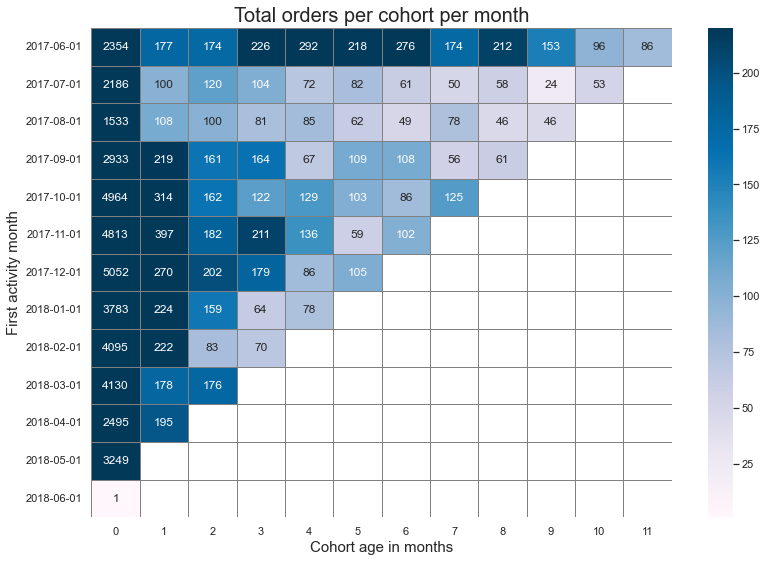

In [52]:
# Creating a pivot table that will showcase total orders per cohort per month
piv_sum_orders = cohort_o.pivot_table(
    index='first_order_month', 
    columns='age_month', 
    values='orders', 
    aggfunc='sum')

sns.set(style='white')
plt.figure(figsize=(13, 9))
fig = sns.heatmap(
    piv_sum_orders,
    annot=True,
    fmt='.0f',
    linewidths=1,
    linecolor='gray',
    cmap = 'PuBu',
    vmax = 220)
plt.title('Total orders per cohort per month', fontsize=20)
plt.xlabel('Cohort age in months', fontsize=15)
plt.ylabel('First activity month', fontsize=15)
plt.show();

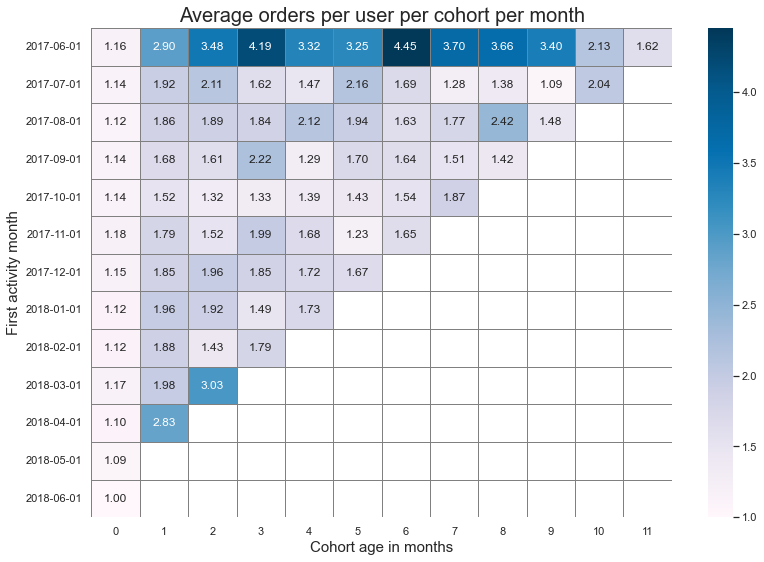

In [53]:
# Creating a pivot table that will showcase the average amount of orders per user per cohort each month
orders_per_user_piv = cohort_o.pivot_table(
    index='first_order_month', 
    columns='age_month', 
    values='ord_per_customer', 
    aggfunc='sum')

sns.set(style='white')
plt.figure(figsize=(13, 9))
fig = sns.heatmap(
    orders_per_user_piv,
    annot=True,
    fmt='.2f',
    linewidths=1,
    linecolor='gray',
    cmap = 'PuBu')
plt.title('Average orders per user per cohort per month', fontsize=20)
plt.xlabel('Cohort age in months', fontsize=15)
plt.ylabel('First activity month', fontsize=15)
plt.show();

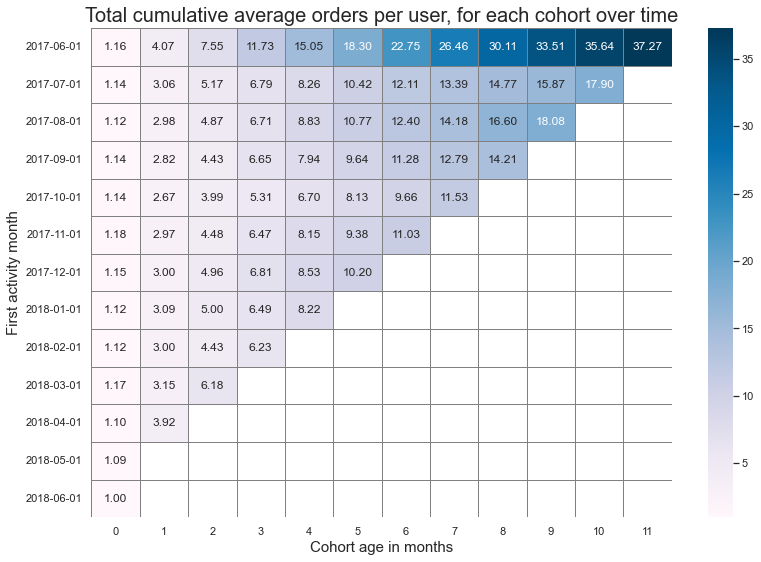

In [54]:
# Creating a pivot table that will showcase the total cumulative average orders per user, for each cohort each month
cumulative_cohort_piv = cohort_o.pivot_table(
    index='first_order_month', 
    columns='age_month', 
    values='ord_per_customer', 
    aggfunc='sum'
).cumsum(axis=1)

sns.set(style='white')
plt.figure(figsize=(13, 9))
fig = sns.heatmap(
    cumulative_cohort_piv,
    annot=True,
    fmt='.2f',
    linewidths=1,
    linecolor='gray',
    cmap = 'PuBu')
plt.title('Total cumulative average orders per user, for each cohort over time', fontsize=20)
plt.xlabel('Cohort age in months', fontsize=15)
plt.ylabel('First activity month', fontsize=15)
plt.show();

#### Intermediate conclusion
- The initial cohort average orders per user is fairly low, only around 1.15 orders per user, but over time as the number of users of the original cohort dwindles, the average orders per user grows, it seems that over time we mostly maintain very loyal customers.
- Once more we can see a spike around new years.
- The cohort of 2017-06-01 seems to very our most loyal cohort.

<a id='Our_customers_average_purchase_size'></a>

### `Our customers average purchase size`

In [55]:
# Adding a sum revenue per cohort per month column
ord_rev = orders.groupby(['first_order_month','order_month'])['revenue'].sum().reset_index()
ord_rev.columns = ['first_order_month','month','sum_revenue']
cohort_o = cohort_o.merge(ord_rev, on=['first_order_month','month'])

In [56]:
# Adding a average order size per cohort per month column
cohort_o['avg_order_size'] = (cohort_o['sum_revenue'] / cohort_o['orders'])

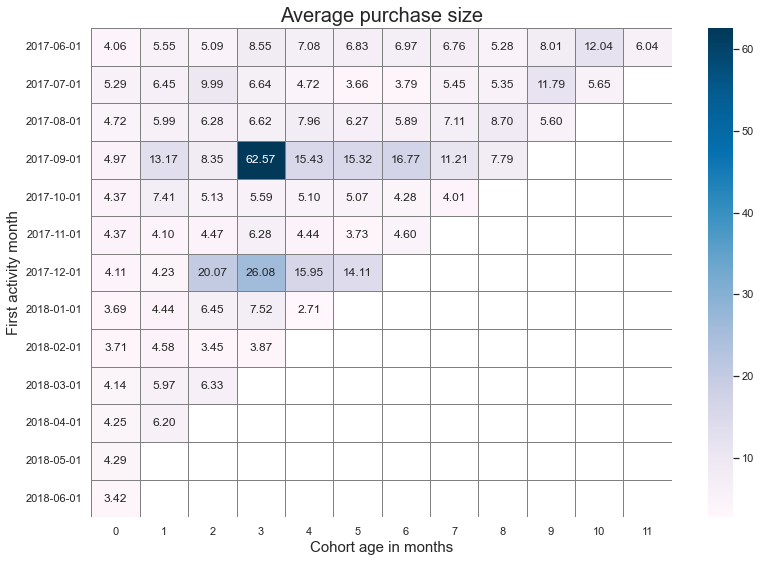

In [57]:
# Creating a pivot table that will showcase the average purchase size per cohort per month
average_rev_piv = cohort_o.pivot_table(
    index='first_order_month', 
    columns='age_month', 
    values='avg_order_size', 
    aggfunc='sum'
)

sns.set(style='white')
plt.figure(figsize=(13, 9))
fig = sns.heatmap(
    average_rev_piv,
    annot=True,
    fmt='.2f',
    linewidths=1,
    linecolor='gray',
    cmap = 'PuBu')
plt.title('Average purchase size', fontsize=20)
plt.xlabel('Cohort age in months', fontsize=15)
plt.ylabel('First activity month', fontsize=15)
plt.show();

#### Intermediate conclusion
- As we have seen before, after the initial creating month of a cohort, usually we are only left with more loyal customers, we can also see this here, the average purchase size increases after the creation month of a cohort.
- We can also see some cohorts have spikes in average purchase size such as the 2017-09-01 and 2017-12-01 cohorts, possible reasoning can be big customers that make big purchases.

<a id='How_much_money_our_customers_bring,_LTV_(Life_Time_Value)_of_a_customer'></a>

### `How much money our customers bring, LTV (Life Time Value) of a customer`

In [58]:
# Adding a cohort size column
cohort_t = orders.groupby('first_order_month')['uid'].nunique().reset_index()
cohort_t.columns=['first_order_month', 'cohort_size']
cohort_t['first_order_month'] = cohort_t['first_order_month'].astype('datetime64[M]')
cohort_o['first_order_month'] = cohort_o['first_order_month'].astype('datetime64[M]')
cohort_o = cohort_o.merge(cohort_t, on='first_order_month')
cohort_o['first_order_month'] = cohort_o['first_order_month'].dt.date

In [59]:
# Adding a ltv column
margin_rate = 1
cohort_o['ltv'] = cohort_o['sum_revenue'] * margin_rate / cohort_o['cohort_size']

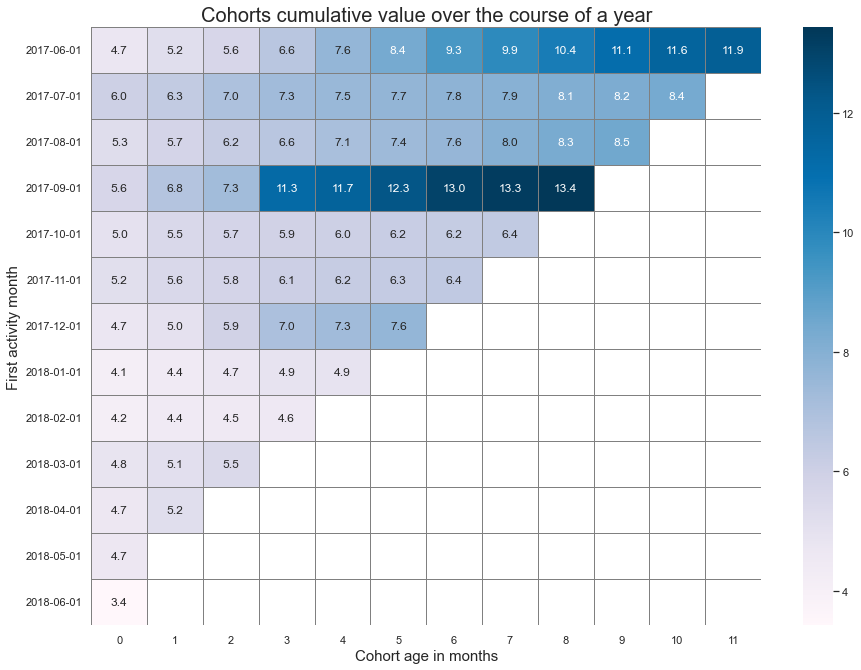

In [60]:
# Creating a pivot table that will showcase the cohorts lifetime value over the course of a year
ltv_cohort_piv = cohort_o.pivot_table(
    index='first_order_month', 
    columns='age_month', 
    values='ltv', 
    aggfunc='sum'
).cumsum(axis=1)

sns.set(style='white')
plt.figure(figsize=(15, 11))
fig = sns.heatmap(
    ltv_cohort_piv,
    annot=True,
    fmt='.1f',
    linewidths=1,
    linecolor='gray',
    cmap = 'PuBu')
plt.title('Cohorts cumulative value over the course of a year', fontsize=20)
plt.xlabel('Cohort age in months', fontsize=15)
plt.ylabel('First activity month', fontsize=15)
plt.show();

#### Intermediate conclusion
- Like in the previous chart, we can see spikes in the 2017-09-01 and 2017-12-01 cohorts, again probably those big orders from big spenders, they also bring big revenue.
- Each cohort has its own characteristics, defined by its customers, some have big spenders, some smaller spenders, some cohorts double their life time value over the course of a few months, some dont really increase their total by much even after a long time.

<a id='Sales_analysis_conclusions'></a>

### `Sales analysis conclusions`
- After the initial creation month of a cohort, our cohorts are left with a much smaller customer size, altho, these are much more loyal customers, who make on average much more purchases, and much larger purchases too.
- Cohorts sales are greatly defined by their customers, some cohorts have big spenders which bring big money, and some are just casual cohorts with casual earnings.
- Our 2 best cohorts are the 2017-09-01 and 2017-12-01 cohorts, their lifetime value grows the fastest out of all the other cohorts.

***
<a id='marketing'></a>

## Marketing

<a id='How_much_money_we_spent,_overall,_per_source,_over_the_months'></a>

### `How much money we spent, overall, per source, over the months`

In [61]:
# Looking at total marketing costs
print('In total, we spent {} on marketing costs'.format(costs['costs'].sum()))

In total, we spent 329131.62 on marketing costs


In [62]:
# Looking at total marketing costs per source
costs_per_source = costs.groupby(['source_id'])['costs'].sum().reset_index()
costs_per_source.style.background_gradient(cmap = 'PuBu')

In [63]:
# Adding a month column for each expense
costs['c_month'] = pd.to_datetime(
    costs['dt'], unit='d') - pd.to_timedelta(
        costs['dt'].dt.day, unit='d') + dt.timedelta(days=1)

In [64]:
# Creating a table that will showcase the total costs per month per cohort over the months
cost_total = costs.groupby(['c_month', 'source_id'])['costs'].sum().reset_index()
cost_total.columns = ['c_month', 'source_id','sum_costs']

In [65]:
# Showcasing the tables values with a line chart
fig = px.line(cost_total, x='c_month', y='sum_costs', color='source_id')
fig.update_layout(
    plot_bgcolor='AliceBlue',
    title='Total costs per month per source',
    xaxis_title='June 2017 - May 2018',
    yaxis_title='Total costs',
    legend_title='Source ID')

#### Intermediate conclusion
- Our most expensive marketing source is source 3, our least expensive is source 10.
- We can see that towards the new years, 3-4 months prior, there is a surge in expenses, and then shortly after it starts to dwindle.
- Altho when we transitioned from october to november, source 3 hit its highest expense rate, source 4 which is our 2nd most expensive source, saw a decrease in that month, the only source to do so.

<a id='hhh'></a>

### `How much did customer acquisition cost from each of the sources`

In [66]:
# Adding a column that will show the first source the customer came from
first_source = visits.sort_values('start_ts').groupby('uid')['source_id'].first().reset_index()
first_source.columns = ['uid', 'first_source']
orders = orders.merge(first_source, on=['uid'], how='left')

In [67]:
# Converting first order month column into date time dtype
orders['first_order_month'] = orders['first_order_month'].astype('datetime64[M]')

In [68]:
# Creating a column that will show the number of buyers per month per source
orders_per_month_source = orders.groupby(['first_order_month', 'first_source'])['uid'].nunique().reset_index()
orders_per_month_source.columns = ['c_month', 'source_id', 'buyers']

In [69]:
# Creating a table that will show the costs and the buyers per month per source
cac_per_month_source = cost_total.merge(orders_per_month_source, how='left', on=['c_month', 'source_id'])

In [70]:
# Calculating customer acquisition cost
cac_per_month_source['cac'] = cac_per_month_source['sum_costs'] / cac_per_month_source['buyers']

In [71]:
# Creating a clients per source column
orders_by_source = orders.groupby(['first_source'], as_index=False).agg({'uid':'nunique'}).\
                rename(columns={'uid':'clients', 'first_source':'source_id'})
orders_by_source = costs_per_source.merge(orders_by_source, how='left', on='source_id')
orders_by_source.style.background_gradient(cmap = 'PuBu')

In [72]:
# Removing unnecessary hours minutes seconds values from c_month
cac_per_month_source['c_month'] = cac_per_month_source['c_month'].dt.date

In [73]:
# Showcasing customer acquisition cost per source across one year, using a line plot
fig = px.line(cac_per_month_source, x='c_month', y='cac', color='source_id')
fig.update_layout(
    plot_bgcolor='AliceBlue',
    title='Customer acquisition cost per source per month',
    xaxis_title='June 2017 - May 2018',
    yaxis_title='Total costs',
    legend_title='Source ID')

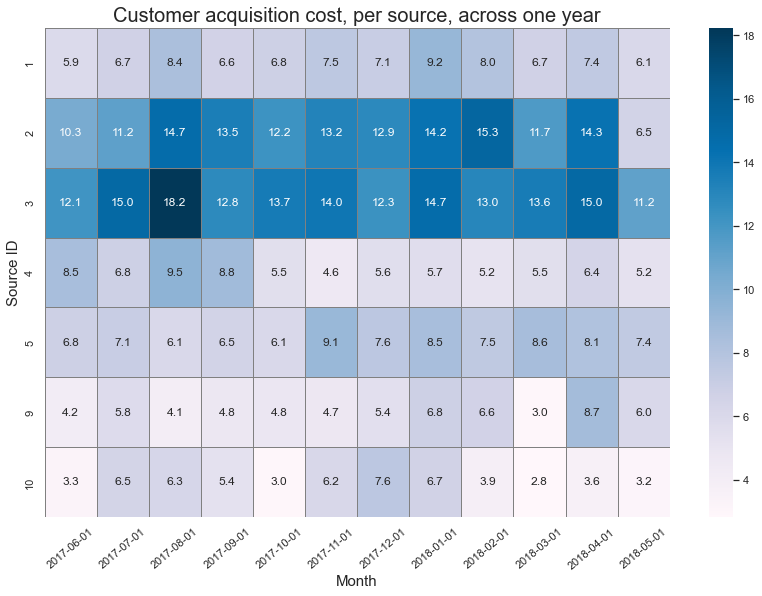

In [74]:
# Showcasing customer acquisition cost per source across one year, using a pivot table
cac_piv = cac_per_month_source.pivot_table(
    index='source_id', 
    columns='c_month', 
    values='cac', 
    aggfunc='sum')

sns.set(style='white')
plt.figure(figsize=(14, 9))
fig = sns.heatmap(
    cac_piv,
    annot=True,
    fmt='.1f',
    linewidths=1,
    linecolor='gray',
    cmap = 'PuBu')
plt.title('Customer acquisition cost, per source, across one year', fontsize=20)
plt.xlabel('Month', fontsize=15)
plt.xticks(rotation=40)
plt.ylabel('Source ID', fontsize=15)
plt.show();

#### Intermediate conclusion
- The 2 sources with the highest CAC are 3 and 2
- The source with the lowest CAC is source 10.

<a id='How_worthwhile_were_our_investments,_ROI_(Return_On_Investment)'></a>

### `How worthwhile were our investments, ROI (Return On Investment)`

In [75]:
# Creating a total costs per cohort column
cost_per_cohort = costs.groupby('c_month')['costs'].sum().reset_index()
cost_per_cohort.columns = ['first_order_month', 'costs']

In [76]:
# Creating a table that will help us calculate roi
cohort_o['first_order_month'] = cohort_o['first_order_month'].astype('datetime64[M]')
roi = pd.merge(
    cohort_o[['first_order_month', 'month', 'user_count', 'age_month', \
              'sum_revenue', 'cohort_size', 'ltv']], cost_per_cohort, on='first_order_month', how='left')

In [77]:
# Calculating cac and roi 
roi['cac'] = roi['costs'] / roi['cohort_size']
roi['roi'] = roi['ltv'] / roi['cac']

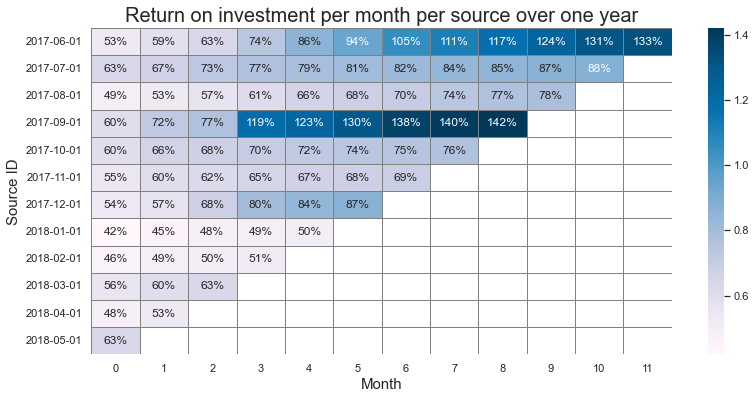

In [78]:
# Showcasing cumulative roi per cohort over the span of one year
roi['first_order_month'] = roi['first_order_month'].dt.date
roi_piv = roi.pivot_table(
    index='first_order_month',
    columns='age_month',
    values='roi',
    aggfunc='mean'
).cumsum(axis=1).round(2)

sns.set(style='white')
plt.figure(figsize=(13, 6))
fig = sns.heatmap(
    roi_piv,
    annot=True,
    fmt='.0%',
    linewidths=1,
    linecolor='gray',
    cmap = 'PuBu')
plt.title('Return on investment per month per source over one year', fontsize=20)
plt.xlabel('Month', fontsize=15)
plt.ylabel('Source ID', fontsize=15)
plt.show();

In [79]:
# Creating a table that will show total revenue, costs and clients per source
roi_per_source = orders.groupby('first_source')['revenue'].sum().reset_index()
roi_per_source.columns=['source_id' ,'revenue']
roi_per_source = roi_per_source.merge(orders_by_source, on='source_id')

In [80]:
# Calculating ltv, cac, and romi per source
roi_per_source['ltv'] = roi_per_source['revenue'] * margin_rate / roi_per_source['clients']
roi_per_source['cac'] = roi_per_source['costs'] / roi_per_source['clients']
roi_per_source['romi'] = roi_per_source['ltv'] / roi_per_source['cac']
roi_per_source.style.background_gradient(cmap = 'PuBu')

In [81]:
# Showcasing romi per source using a bar plot
roi_per_source.columns = ['source', 'revenue', 'costs', 'clients', 'ltv', 'cac', 'romi']
fig = px.bar(roi_per_source,
             x='source',
             y='romi',
             color_discrete_sequence = ['lightskyblue'],
             title='Return on marketing investment per source')
fig.update_xaxes(type='category')

#### Intermediate conclusion
- Not all sources are profitable, sources 3, 4 and 10 so far brought us negative returns.
- Source 1 has the best romi out of all sources
- When we viewed the CAC graph we saw that source 3 had the highest cost per obtained customer, but is it profitable? definitely the least profitable source we have.

<a id='Marketing_analysis_conclusions'></a>

### `Marketing analysis conclusions`
- Source 3 is expensive, and is the least rewarding source we have.
- Source 1 is the most profitable.
- Source 2, 5 and 9 are also  profitable.
- Source 2 clients have a very high life time value, but that is mitigated by the high cost we pay to acquire them.

***
<a id='General_conclusion_&_suggestions'></a>

# General conclusion & suggestions
- In terms of platform, desktop was 3 times more popular over the touch platform, nevertheless they are both importent as the more platforms we use the bigger our reach to customers will be!
- In terms of sources, I would recommend reconsidering using source 3, if we look at customer acquisition cost, it is a very expensive source in comparison to other sources, I would also recommend looking into sources 9 and 10, as they bring a very small amount of orders, sources 1, 2, 4 and 5 are great sources and we should keep using them or even boost our usage with them.
- Around the month of september we can expect a growing demand for our product, up untill around march when numbers start to dwindle, it is recommended to boost our marketing efforts around that time frame.
- Altho our product has alot of visitors the retention rate isnt very high, after using our product only around 6-7% of users keep using on a monthly basis, we might want to find new ways to encourage new visitors to keep using our product as it seems most of them only use it as a one time thing, mabye a discount on your next purchase or something of that kind will do?
- We might only retain a small amount of users after each month, but those that do stay are very loyal customers, who use the product on a monthly basis, and make alot of purchases, mabye we can introduce a referral system where these users will have the ability to help us gain more users, we can ofcourse reward them for each user they bring.
- **Bottom line, ditch source 3, boost usage of sources 1, 2, 4 and 5, desktop is a more popular platform boost marketing efforts there but touch is also very importent, boost marketing efforts between september and march as there is a surge in demand, we are very good at getting people to register to our product less good at keeping them as customers try to find new ways to encourage new users to stay longer.**

***

#### Tom Fern